In [1]:
using Pkg
Pkg.add(["Optimization", "OptimizationOptimJL", "ForwardDiff"])

    Updating registry at `C:\Users\thake\.julia\registries\General.toml`
   Resolving package versions...
   Installed FunctionWrappersWrappers ──── v0.1.3
   Installed GPUArraysCore ─────────────── v0.1.6
   Installed ConsoleProgressMonitor ────── v0.1.2
   Installed DiffRules ─────────────────── v1.15.1
   Installed SciMLBase ─────────────────── v2.56.1
   Installed SciMLStructures ───────────── v1.5.0
   Installed Accessors ─────────────────── v0.1.38
   Installed L_BFGS_B_jll ──────────────── v3.0.1+0
   Installed TableTraits ───────────────── v1.0.1
   Installed ADTypes ───────────────────── v1.9.0
   Installed DiffResults ───────────────── v1.1.0
   Installed RuntimeGeneratedFunctions ─── v0.5.13
   Installed LBFGSB ────────────────────── v0.4.1
   Installed SciMLOperators ────────────── v0.3.10
   Installed Optimization ──────────────── v4.0.3
   Installed PositiveFactorizations ────── v0.2.4
   Installed ProgressLogging ───────────── v0.1.4
   Installed IteratorInterfaceExtensi

In [45]:
Pkg.add(["Optim", "Plots"])

   Resolving package versions...
   Installed JpegTurbo_jll ────── v3.0.4+0
   Installed libpng_jll ───────── v1.6.44+0
   Installed Glib_jll ─────────── v2.80.5+0
   Installed LZO_jll ──────────── v2.10.2+1
   Installed Zstd_jll ─────────── v1.5.6+1
   Installed FFMPEG ───────────── v0.4.2
   Installed Cairo_jll ────────── v1.18.2+1
   Installed TranscodingStreams ─ v0.11.3
    Updating `C:\Users\thake\.julia\environments\v1.10\Project.toml`
  [91a5bcdd] + Plots v1.40.8
    Updating `C:\Users\thake\.julia\environments\v1.10\Manifest.toml`
  [d1d4a3ce] + BitFlags v0.1.9
  [944b1d66] + CodecZlib v0.7.6
  [35d6a980] + ColorSchemes v3.26.0
  [3da002f7] + ColorTypes v0.11.5
  [c3611d14] + ColorVectorSpace v0.10.0
  [5ae59095] + Colors v0.12.11
  [f0e56b4a] + ConcurrentUtilities v2.4.2
  [d38c429a] + Contour v0.6.3
  [8bb1440f] + DelimitedFiles v1.9.1
  [460bff9d] + ExceptionUnwrapping v0.1.10
  [c87230d0] + FFMPEG v0.4.2
  [53c48c17] + FixedPointNumbers v0.8.5
  [1fa38f19] + Format v1.3.7


In [1]:
using Optimization, OptimizationOptimJL, ForwardDiff, Optim, Plots

In [2]:
# function definition
f0(x) = 1.5 - 1.0*exp(-0.03*(3*x[1].^2 + x[2].^2))
x0 = [1.0, 1.0]

2-element Vector{Float64}:
 1.0
 1.0

In [3]:
# DIRECTLY MODELING EQUATION AFTER DOC TUTORIAL
f0(x, p) = 1.5 - 1.0 * exp(-0.03 * (p[1] * x[1]^2 + p[2] * x[2]^2))
x0 = [1.0, 1.0]
p = [3.0, 1.0]

optf = OptimizationFunction(f0, AutoForwardDiff())
prob = OptimizationProblem(optf, x0, p)


OptimizationProblem. In-place: true
u0: 2-element Vector{Float64}:
 1.0
 1.0

In [4]:
path = []
callback = function (state::Optimization.OptimizationState, args ...; doplot = false)
    push!(path, copy(state.u)) 
    return false  
end


#1 (generic function with 1 method)

In [5]:
sol = solve(prob, Optim.GradientDescent(), callback = callback)

retcode: Success
u: 2-element Vector{Float64}:
 1.2264745678021365e-8
 7.136024576160508e-8

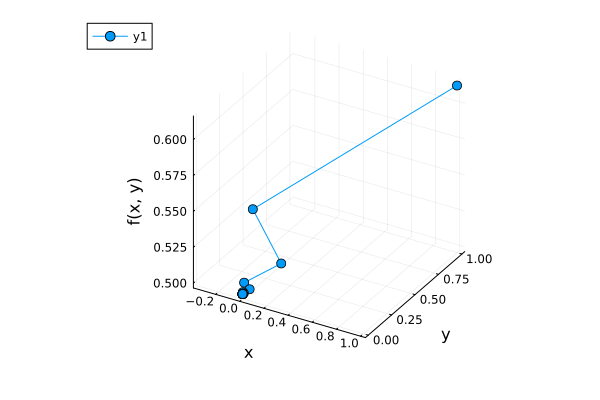

In [6]:
xs = [x[1] for x in path]
ys = [x[2] for x in path]
z = [f0([x,y], p) for (x,y) in zip(xs, ys)]
plot3d(xs, ys, z, marker=:circle, markersize=5)
xlabel!("x")
ylabel!("y")
zlabel!("f(x, y)")

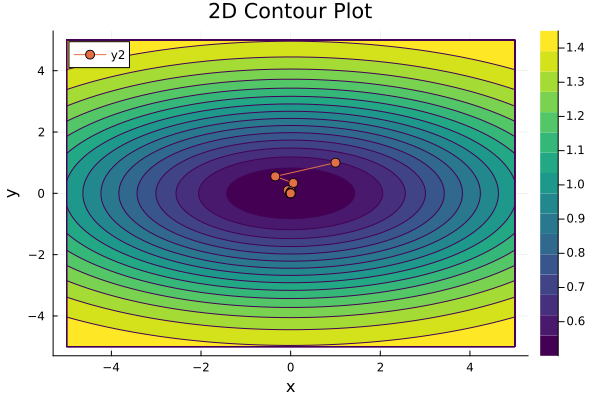

In [12]:
f0(x1, x2, p1=3.0, p2=1.0) = 1.5 - 1.0 * exp(-0.03 * (p1 * x1^2 + p2 * x2^2))
xss = range(-5, 5, length=100)
yss = range(-5, 5, length=100)
zss = [f0(x, y) for x in xss, y in yss]
contour(xss, yss, zss, title="2D Contour Plot",
        xlabel="x", ylabel="y", fill=true, c=:viridis)
plot!(xs, ys, marker=:circle, markersize=5)